In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
data = pd.read_csv('D:\\SHAI Training\\level_1\\classification\\advertising.csv')

In [31]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [33]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [34]:
data.describe(include=object)

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


Text(0.5, 0, 'Age')

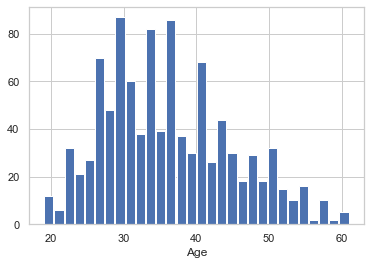

In [35]:
sns.set()
from matplotlib import figure
sns.set_style('whitegrid')
data['Age'].hist(bins=30,rwidth=0.9)
plt.xlabel('Age')

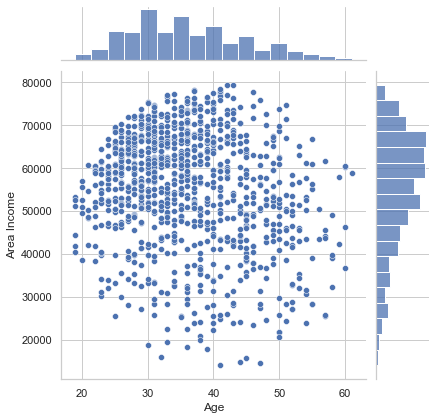

In [36]:
sns.jointplot(x='Age',y='Area Income',data=data)

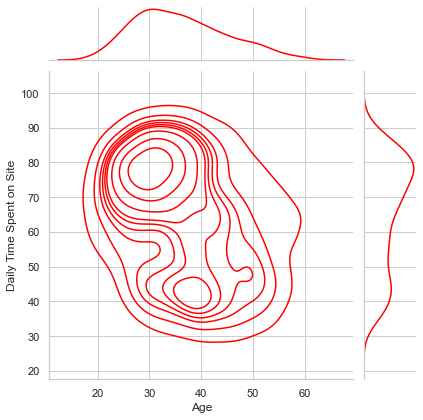

In [37]:
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', data = data, kind = 'kde', color = 'red')

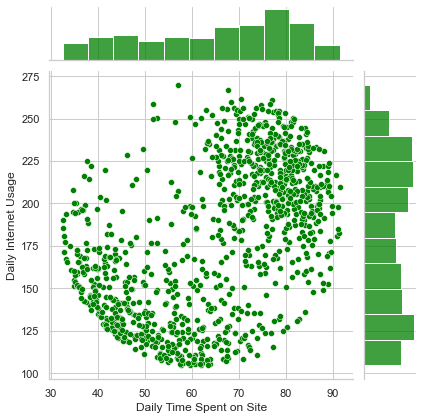

In [38]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = data, color = 'green')

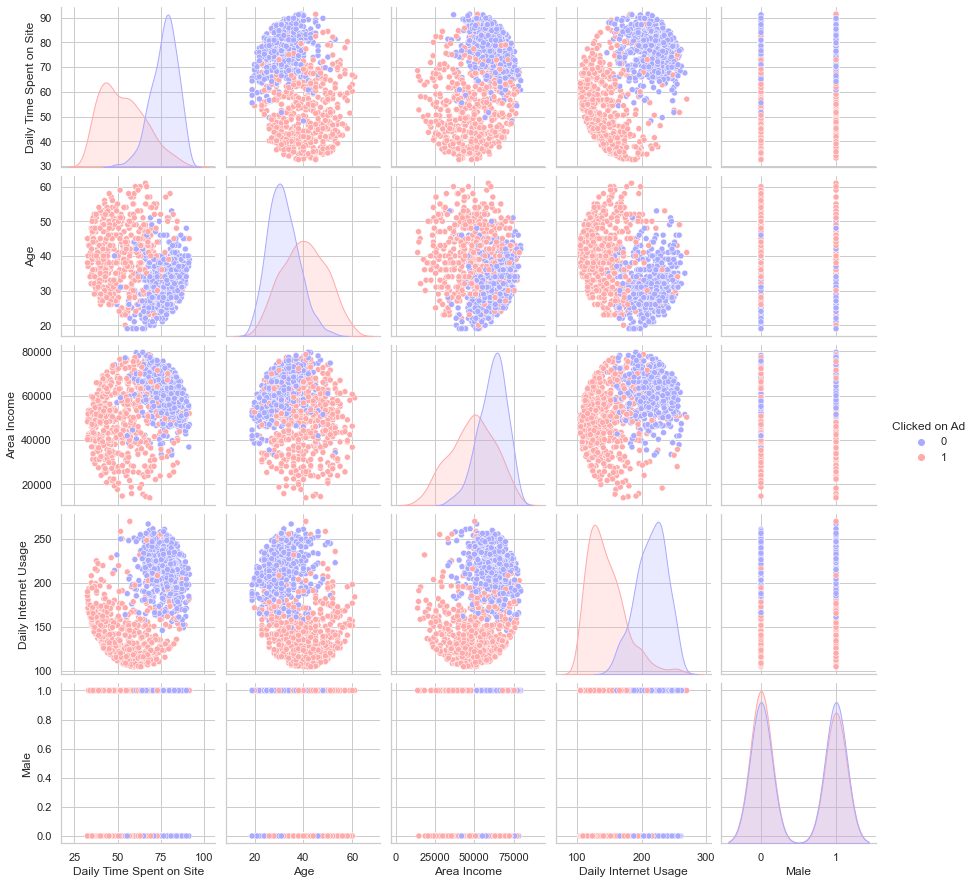

In [39]:
sns.pairplot(data, hue = 'Clicked on Ad', palette = 'bwr')

In [40]:
df_tr_cpy = data.copy()

In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_tr_cpy['Ad Topic Line']= label_encoder.fit_transform(df_tr_cpy['Ad Topic Line'])
df_tr_cpy['City']= label_encoder.fit_transform(df_tr_cpy['City'])
df_tr_cpy['Country']= label_encoder.fit_transform(df_tr_cpy['Country'])
df_tr_cpy['Timestamp']= label_encoder.fit_transform(df_tr_cpy['Timestamp'])

<AxesSubplot:>

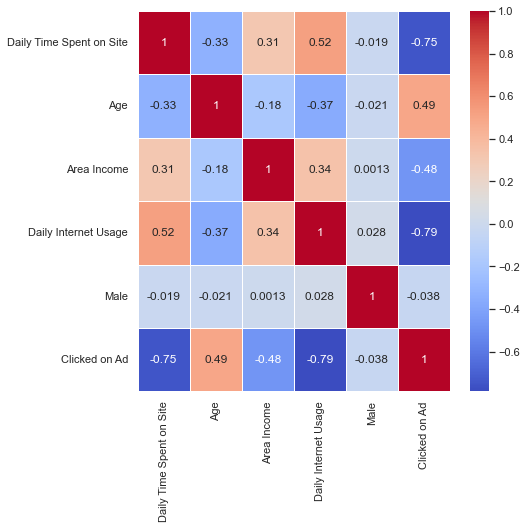

In [42]:
plt.figure(figsize=(7, 7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

<AxesSubplot:>

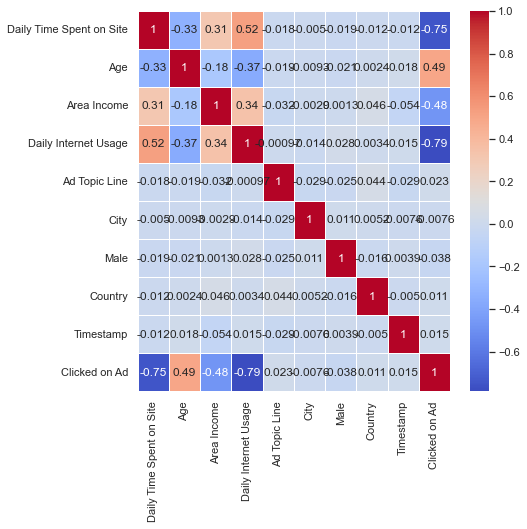

In [43]:
plt.figure(figsize=(7, 7))
sns.heatmap(df_tr_cpy.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

In [ ]:
#From the previous figure, we conclude that the two best advantages :Daily Internet Usage & Daily Time Spent on Site

In [44]:
df_tr_cpy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,91,961,0,215,439,0
1,80.23,31,68441.85,193.77,464,903,1,147,474,0
2,69.47,26,59785.94,236.50,566,111,0,184,367,0
3,74.15,29,54806.18,245.89,903,939,1,103,56,0
4,68.37,35,73889.99,225.58,766,805,0,96,767,0


In [197]:
X = data[['Daily Time Spent on Site','Daily Internet Usage']]
y = data['Clicked on Ad']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Data Normalization was applied, but the results were not good

In [ ]:
# X1=X.copy()
# from sklearn.preprocessing import MinMaxScaler
# arr_normalize = preprocessing.normalize(X1)

In [198]:
print("======================== LogisticRegression ======================")
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
#================================================
y_predict = logistic_model.predict(X_test)
#================================================
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
print("========================================================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))
c =confusion_matrix(y_test, y_predict)
acc = c.diagonal().sum() /c.sum()
print("======================Accuracy=============================")
print("Acc is  : " ,acc)

======================== LogisticRegression ======================
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.93      0.97        46

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

[[54  0]
 [ 3 43]]
======================Accuracy=============================
Acc is  :  0.97


In [199]:
print("========================  RandomForestClassifier ======================")
from sklearn.ensemble import RandomForestClassifier
Forest_model = RandomForestClassifier()
Forest_model.fit(X_train,y_train)
#================================================
y_predict_Forest = Forest_model.predict(X_test)
#================================================
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_Forest))
print("========================================================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict_Forest))
c =confusion_matrix(y_test, y_predict_Forest)
acc = c.diagonal().sum() /c.sum()
print("======================Accuracy=============================")
print("Acc is  : " ,acc)

========================  RandomForestClassifier ======================
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       1.00      0.91      0.95        46

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

[[54  0]
 [ 4 42]]
======================Accuracy=============================
Acc is  :  0.96


In [200]:
print("========================  KNNClassifier ======================")
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=40)
knn_model.fit(X_train,y_train)
#================================================
y_predict_knn = knn_model.predict(X_test)
#================================================
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_knn))
print("==================confusion_matrix=======================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict_knn))
c =confusion_matrix(y_test, y_predict_knn)
acc = c.diagonal().sum() /c.sum()
print("======================Accuracy=============================")
print("Acc is  : " ,acc)

========================  KNNClassifier ======================
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       1.00      0.91      0.95        46

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

==================confusion_matrix=======================
[[54  0]
 [ 4 42]]
======================Accuracy=============================
Acc is  :  0.96


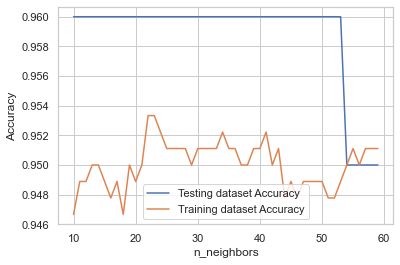

In [201]:
neighbors = np.arange(10, 60)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn_model.score(X_train, y_train)
    test_accuracy[i] = knn_model.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()